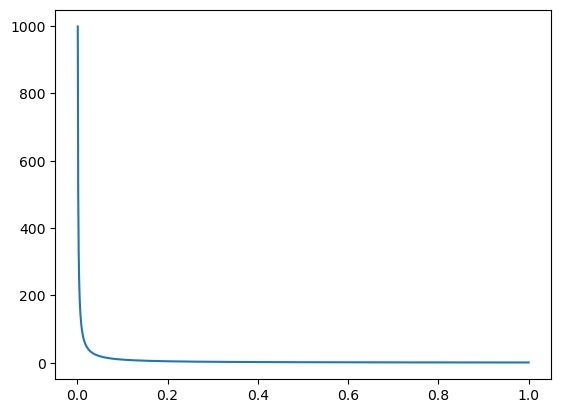

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

x = np.linspace(0, 1, 1000)
y = gamma(x)

plt.plot(x, y)

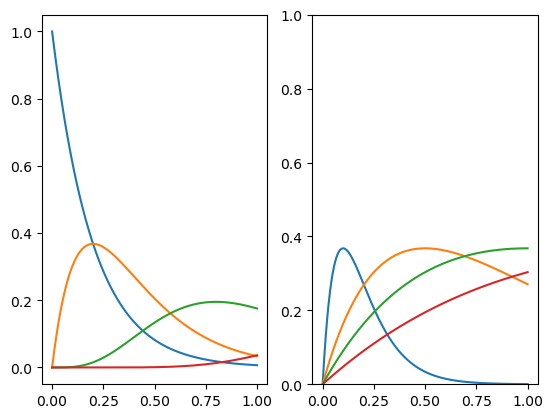

In [4]:
GamDistr = lambda X, alpha, beta: 1/(gamma(alpha)) * (X/beta)**(alpha-1) * np.exp(-X/beta)

axes, figs = plt.subplots(1, 2)

plt.ylim(0, 1)

figs[0].plot(x, GamDistr(x, alpha=1, beta=.2))
figs[0].plot(x, GamDistr(x, alpha=2, beta=.2))
figs[0].plot(x, GamDistr(x, alpha=5, beta=.2))
figs[0].plot(x, GamDistr(x, alpha=10, beta=.2))

figs[1].plot(x, GamDistr(x, alpha=2, beta=.1))
figs[1].plot(x, GamDistr(x, alpha=2, beta=.5))
figs[1].plot(x, GamDistr(x, alpha=2, beta=1))
figs[1].plot(x, GamDistr(x, alpha=2, beta=2))

C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: divide by zero encountered in power
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: invalid value encountered in multiply
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)


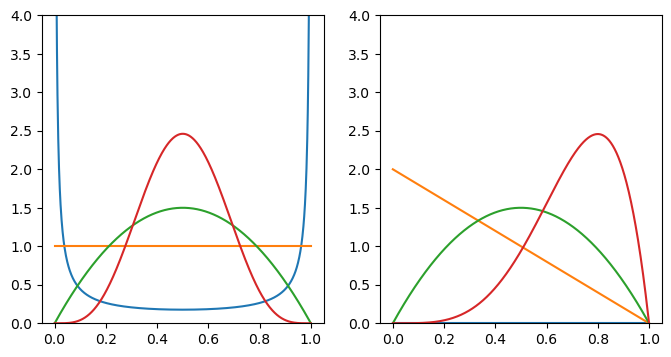

In [5]:

Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)
BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)

figs, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_ylim(0, 4)
axes[0].plot(x, BetaDistr(x, alpha=.1, beta=.1))
axes[0].plot(x, BetaDistr(x, alpha=1, beta=1))
axes[0].plot(x, BetaDistr(x, alpha=2, beta=2))
axes[0].plot(x, BetaDistr(x, alpha=5, beta=5))

axes[1].set_ylim(0, 4)
axes[1].plot(x, BetaDistr(x, alpha=0, beta=2))
axes[1].plot(x, BetaDistr(x, alpha=1, beta=2))
axes[1].plot(x, BetaDistr(x, alpha=2, beta=2))
axes[1].plot(x, BetaDistr(x, alpha=5, beta=2))

C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: invalid value encountered in multiply
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: overflow encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: invalid value encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)


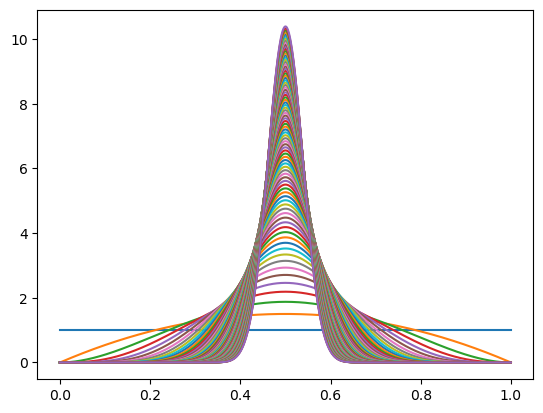

In [6]:
for i in range(1, 1000):
    plt.plot(x, BetaDistr(x, alpha=i, beta=i))

In [10]:
import pandas as pd
df = pd.DataFrame([np.round([np.random.beta(70, 50), np.random.beta(50, 50), np.random.beta(60, 70)]) for _ in x], columns=['a', 's', 'c']).astype(int)
df

,a,s,c
0,1,0,0
1,1,1,1
2,1,0,1
3,1,0,0
4,1,1,1
...,...,...,...
995,1,1,0
996,1,1,1
997,1,1,1
998,1,1,1


In [11]:
p_a = (df[df['a']==1].shape[0] + 1)/(2 + 1000)
p_s = (df[df['s']==1].shape[0] + 1)/(2 + 1000)

p_a, p_s

(0.9720558882235529, 0.5139720558882236)

In [12]:
def posterior(df, a, s, alpha, beta):
    c_count1 = df[(df['c']==1) & (df['a']==a) & (df['s']==s)].shape[0]
    c_count0 = df[(df['c']==0) & (df['a']==a) & (df['s']==s)].shape[0]
    return (alpha + c_count1)/(alpha + beta + c_count1 + c_count0), c_count1/df.shape[0]

p_c = {
    (1, 1): posterior(df, 1, 1, 1, 1),
    (0, 1): posterior(df, 0, 1, 1, 1),
    (1, 0): posterior(df, 1, 0, 1, 1),
    (0, 0): posterior(df, 0, 0, 1, 1),
}
p_c

{(1, 1): (0.25948103792415167, 0.129),
 (0, 1): (0.35294117647058826, 0.005),
 (1, 0): (0.23319327731092437, 0.11),
 (0, 0): (0.14285714285714285, 0.001)}

In [13]:
p_c_ml = {
    (1, 1): posterior(df, 1, 1, 0, 0),
    (0, 1): posterior(df, 0, 1, 0, 0),
    (1, 0): posterior(df, 1, 0, 0, 0),
    (0, 0): posterior(df, 0, 0, 0, 0),
}
p_c_ml

{(1, 1): (0.25851703406813625, 0.129),
 (0, 1): (0.3333333333333333, 0.005),
 (1, 0): (0.2320675105485232, 0.11),
 (0, 0): (0.08333333333333333, 0.001)}

C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: invalid value encountered in multiply
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: overflow encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: invalid value encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)


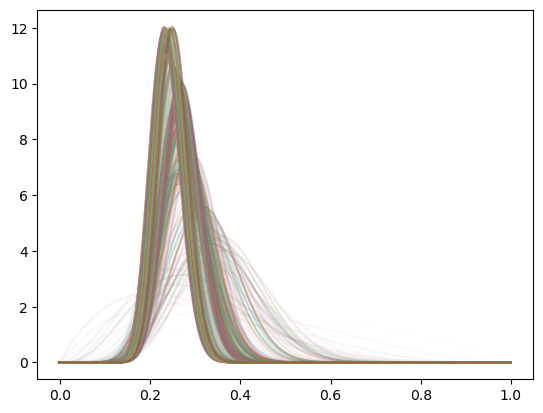

In [14]:
a = b = 1

for i in df.index:
    a += df.iloc[i, 0] == 1 and df.iloc[i, 1] == 0 and df.iloc[i, 2] == 1
    b += df.iloc[i, 0] == 1 and df.iloc[i, 1] == 0 and df.iloc[i, 2] == 0
    plt.plot(x, BetaDistr(x, alpha=a, beta=b), alpha=i/df.shape[0])


C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:2: RuntimeWarning: invalid value encountered in multiply
  BetaDistr = lambda X, beta, alpha: 1/(Beta(alpha, beta)) * X**(alpha-1) * (1-X)**(beta-1)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: overflow encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)
C:\Users\janba\AppData\Local\Temp\ipykernel_20260\2483995447.py:1: RuntimeWarning: invalid value encountered in double_scalars
  Beta = lambda alpha, beta: (gamma(alpha) * gamma(beta))/gamma(alpha + beta)


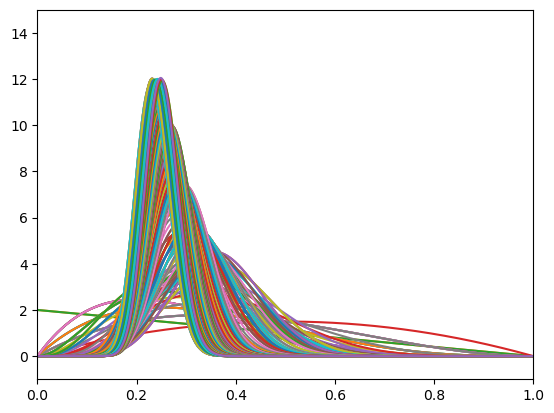

In [15]:
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1, 15))
line, = ax.plot([], [], lw=2)
a = b = 1

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    global a, b
    x = np.linspace(0, 1, 1000)
    a += df.iloc[i, 0] == 1 and df.iloc[i, 1] == 0 and df.iloc[i, 2] == 1 # (a=1, s=0, c=1)
    b += df.iloc[i, 0] == 1 and df.iloc[i, 1] == 0 and df.iloc[i, 2] == 0 # (a=1, s=0, c=0)
    y = BetaDistr(x, alpha=a, beta=b)
    # line.set_data(x, y)
    l, = ax.plot(x, y)
    return l,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)

anim.save("learningBN.mp4")

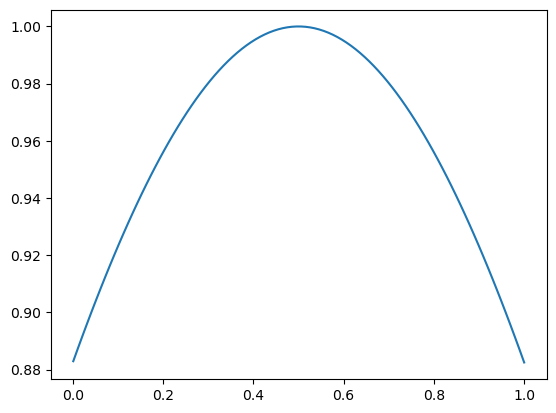

number of tails: 2
number of heads: 8


,heads(1)/tails(0)
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(0.001, 1, 100)
prior = gaussian(x, .5, 1)
plt.plot(x, prior)
plt.show()

N = 10

V = pd.DataFrame(np.round(np.random.uniform(0, 1, N)).astype(int), columns=['heads(1)/tails(0)'])
V = pd.DataFrame(8 * [1] + [0, 0], columns=['heads(1)/tails(0)'])
Nt, Nh = V.value_counts().sort_index()
print(f"number of tails: {Nt}\nnumber of heads: {Nh}")
V

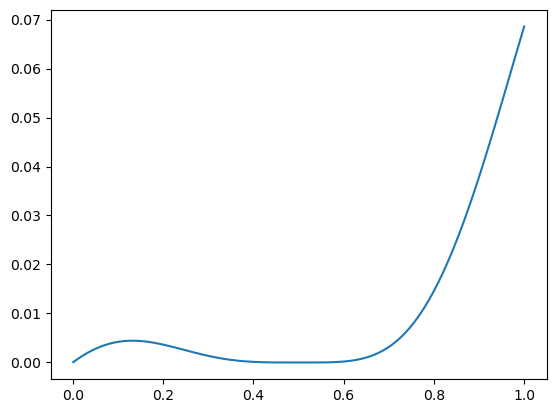

In [17]:
posterior = []
for theta, prob in zip(x, prior):
    posterior.append(theta * prob**Nh * (1-prob)**Nt)

sum_post = sum(posterior)
posterior = list(map(lambda p: p/sum_post, posterior))
# prior[:] = posterior

plt.plot(x, posterior)
# posterior
